In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [73]:
data = pd.read_csv('WebScraping-flight-price-prediction.csv')
data.head()

,Unnamed: 0,Airline,Airline code,Date of journey,Month of journey,Source,Destination,Departure time,Arrival time,Flight duration,Type of flight,Price
0,0,Go First,G8 113,30,9,New Delhi,Bengaluru,05:50,08:35,02 h 45 m,Non stop,7003
1,1,SpiceJet,SG 191,30,9,New Delhi,Bengaluru,06:05,08:55,02 h 50 m,Non stop,7419
2,2,IndiGo,6E 2048,30,9,New Delhi,Bengaluru,03:50,06:40,02 h 50 m,Non stop,7424
3,3,IndiGo,6E 6612,30,9,New Delhi,Bengaluru,06:00,08:35,02 h 35 m,Non stop,7424
4,4,IndiGo,6E 5009,30,9,New Delhi,Bengaluru,06:55,09:50,02 h 55 m,Non stop,7424


In [74]:
data = data.drop(columns = ['Unnamed: 0'], axis = 1)
data.head()

,Airline,Airline code,Date of journey,Month of journey,Source,Destination,Departure time,Arrival time,Flight duration,Type of flight,Price
0,Go First,G8 113,30,9,New Delhi,Bengaluru,05:50,08:35,02 h 45 m,Non stop,7003
1,SpiceJet,SG 191,30,9,New Delhi,Bengaluru,06:05,08:55,02 h 50 m,Non stop,7419
2,IndiGo,6E 2048,30,9,New Delhi,Bengaluru,03:50,06:40,02 h 50 m,Non stop,7424
3,IndiGo,6E 6612,30,9,New Delhi,Bengaluru,06:00,08:35,02 h 35 m,Non stop,7424
4,IndiGo,6E 5009,30,9,New Delhi,Bengaluru,06:55,09:50,02 h 55 m,Non stop,7424


In [75]:
data.shape

(1213, 11)

In [76]:
data.describe()

,Date of journey,Month of journey,Price
count,1213.000000,1213.000000,1213.000000
mean,7.014015,9.901072,10945.107172
std,7.916685,0.298689,4505.285131
min,1.000000,9.000000,6703.000000
25%,3.000000,10.000000,7947.000000
50%,5.000000,10.000000,9419.000000
75%,7.000000,10.000000,11205.000000
max,30.000000,10.000000,32328.000000


In [77]:
data.isna().sum()

Airline             0
Airline code        0
Date of journey     0
Month of journey    0
Source              0
Destination         0
Departure time      0
Arrival time        0
Flight duration     0
Type of flight      0
Price               0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           1213 non-null   object
 1   Airline code      1213 non-null   object
 2   Date of journey   1213 non-null   int64 
 3   Month of journey  1213 non-null   int64 
 4   Source            1213 non-null   object
 5   Destination       1213 non-null   object
 6   Departure time    1213 non-null   object
 7   Arrival time      1213 non-null   object
 8   Flight duration   1213 non-null   object
 9   Type of flight    1213 non-null   object
 10  Price             1213 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 104.4+ KB


### For object type data (categorical)

In [79]:
data.columns

Index(['Airline', 'Airline code', 'Date of journey', 'Month of journey',
       'Source', 'Destination', 'Departure time', 'Arrival time',
       'Flight duration', 'Type of flight', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Type of flight', ylabel='Price'>

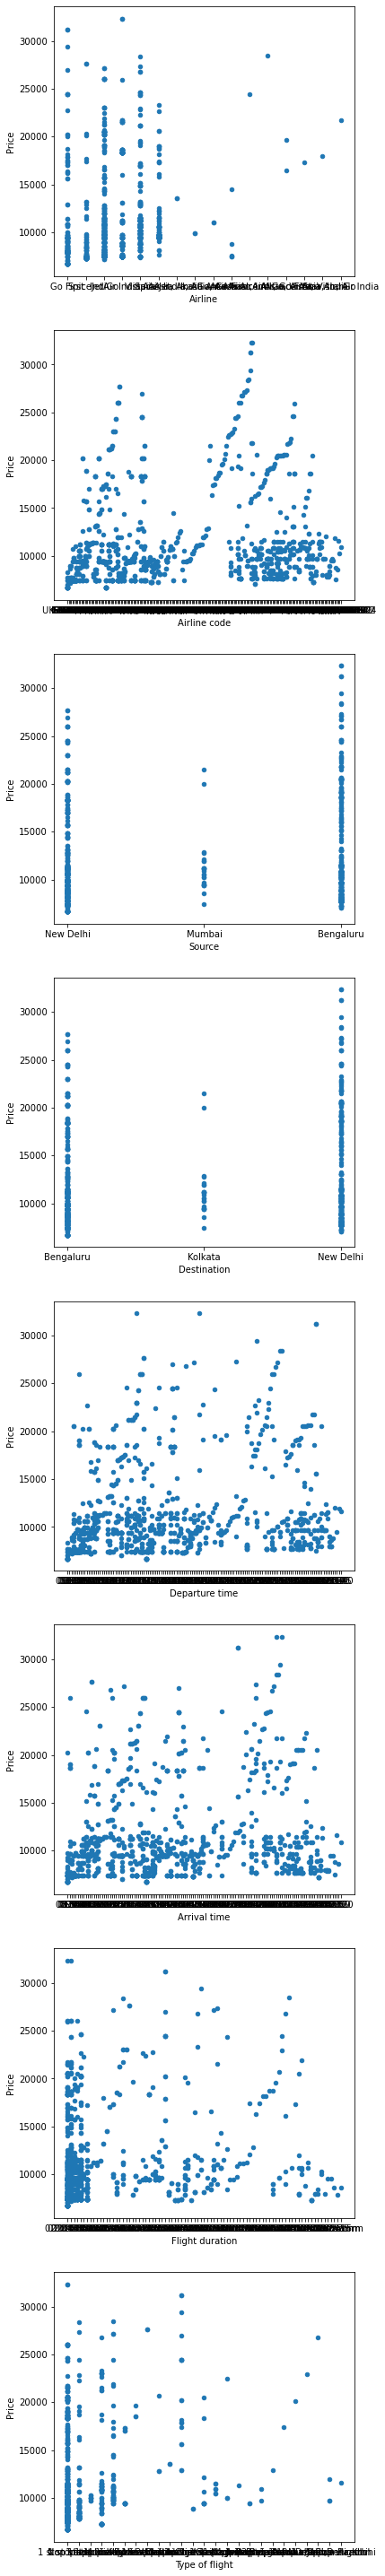

In [80]:
fig, axs = plt.subplots(8,1)

data.plot(kind='scatter',x='Airline',y='Price', ax=axs[0], figsize=(6,52))
data.plot(kind='scatter',x='Airline code',y='Price', ax=axs[1])
data.plot(kind='scatter',x='Source',y='Price', ax=axs[2])
data.plot(kind='scatter',x='Destination',y='Price', ax=axs[3])
data.plot(kind='scatter',x='Departure time',y='Price', ax=axs[4])
data.plot(kind='scatter',x='Arrival time',y='Price', ax=axs[5])
data.plot(kind='scatter',x='Flight duration',y='Price', ax=axs[6])
data.plot(kind='scatter',x='Type of flight',y='Price', ax=axs[7])

- Flights which offer lower prices are chosen by passengers more frequently
- If source is Delhi, then price is cheap and this may be the reason there are so many flights for passengers since people are attracted by cheaper prices.
- Flight duration which are longer tend to have higher price.

## Encoding the data

In [81]:
x = data.drop('Price',axis = 1)

In [82]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

for i in x.columns:
    if data[i].dtypes == 'object':
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [83]:
data.sample()

,Airline,Airline code,Date of journey,Month of journey,Source,Destination,Departure time,Arrival time,Flight duration,Type of flight,Price
556,10.0,22.0,3,10,2.0,0.0,90.0,99.0,2.0,24.0,7424


### Checking multicollinearity

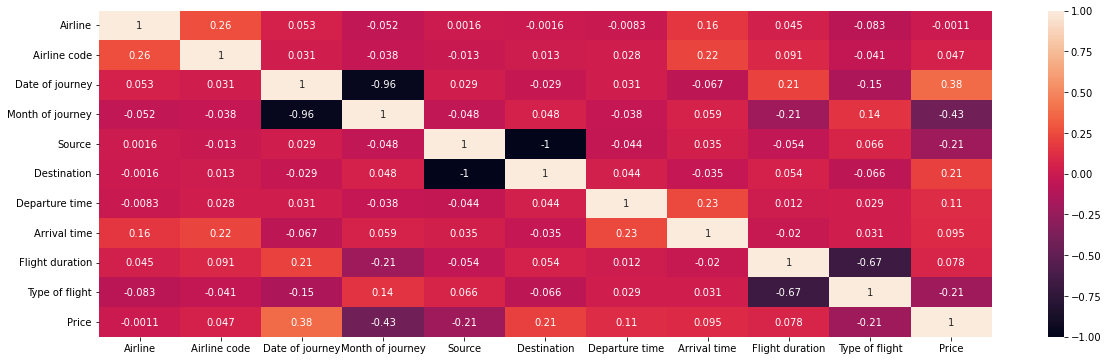

In [84]:
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

### There is no multicollinearity. 

### Checking correlation of features with the target

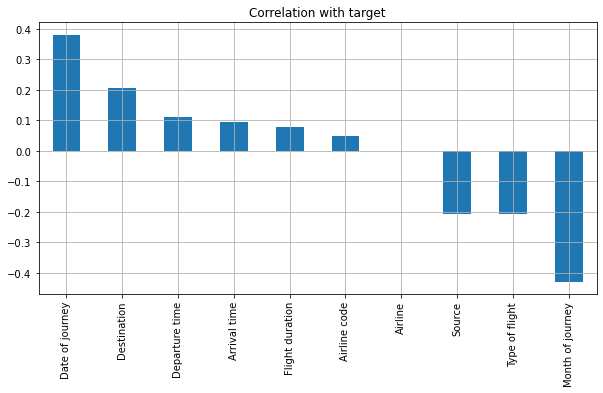

In [85]:
corr = data.drop('Price', axis = 1).corrwith(data.Price).sort_values(ascending = False)

corr.plot(kind = 'bar', grid = True, figsize = (10,5),
          title = "Correlation with target")
plt.show()

In [86]:
data.skew()

Airline            -0.484881
Airline code        0.022815
Date of journey     2.327296
Month of journey   -2.689984
Source             -0.618434
Destination         0.618434
Departure time      0.068856
Arrival time        0.065503
Flight duration     2.468580
Type of flight     -1.672704
Price               1.959029
dtype: float64

In [87]:
data['Date of journey'] = np.log(data['Date of journey'])
data['Month of journey'] = np.log(data['Month of journey'])

In [88]:
data.skew()

Airline            -0.484881
Airline code        0.022815
Date of journey     0.292399
Month of journey   -2.689984
Source             -0.618434
Destination         0.618434
Departure time      0.068856
Arrival time        0.065503
Flight duration     2.468580
Type of flight     -1.672704
Price               1.959029
dtype: float64

## Model Building

In [89]:
x = data.drop('Price', axis = 1)
y = data.Price

In [90]:
from sklearn.linear_model import LinearRegression
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [91]:
xgb = xgb.XGBRegressor()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [92]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    xgb.fit(x_train,y_train)
    y_train_pred = xgb.predict(x_train)
    y_test_pred = xgb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {r2_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9934713870662213
At random state 0, the testing accuracy is : 0.8469330601091201

At random state 1, the training accuracy is : 0.9945134940717
At random state 1, the testing accuracy is : 0.8330338999453654

At random state 2, the training accuracy is : 0.9979420614881546
At random state 2, the testing accuracy is : 0.8364610203078365

At random state 3, the training accuracy is : 0.9941216899529617
At random state 3, the testing accuracy is : 0.8885241581966483

At random state 4, the training accuracy is : 0.9968855786330915
At random state 4, the testing accuracy is : 0.8305697137405311

At random state 5, the training accuracy is : 0.9977034276927927
At random state 5, the testing accuracy is : 0.7118918643550337

At random state 6, the training accuracy is : 0.9944208950527651
At random state 6, the testing accuracy is : 0.8354068763707322

At random state 7, the training accuracy is : 0.9951045631953411
At random state 7, the testi

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 3)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
y_test_pred = xgb.predict(x_test)
print(f"The accuracy score is {r2_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 88.85 %


In [95]:
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[34,45,56,48,63,100],
          'learning_rate': [0.001,0.1,0.01,0.2]}
rnd_search = RandomizedSearchCV(xgb.XGBRegressor(),cv = 3, param_distributions = params)

In [96]:
rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   param_distributions={'learning_rate': [0.001, 0.1, 0.01,
                                                          0.2],
                                        'n_estimators': [34, 45, 56, 48, 63,
                                                         100]})

In [97]:
rnd_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=45, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [98]:
!{sys.executable} -m pip install xgboost
import xgboost as xgb
xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('\n\n***Accuracy post tuning***')
print(metrics.r2_score(y_test,y_pred))



***Accuracy post tuning***
0.891111918058943


## Cross Validation

In [44]:
test_acc = r2_score(y_test,y_test_pred)

for i in range (2,10):
    cv_score = cross_val_score(xgb,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = -60.3547 and accuracy for testing = 88.8524

At cv = 3,cv_score = 67.0698 and accuracy for testing = 88.8524

At cv = 4,cv_score = -72.4327 and accuracy for testing = 88.8524

At cv = 5,cv_score = 38.3113 and accuracy for testing = 88.8524

At cv = 6,cv_score = 26.8264 and accuracy for testing = 88.8524

At cv = 7,cv_score = 56.6233 and accuracy for testing = 88.8524

At cv = 8,cv_score = 51.2778 and accuracy for testing = 88.8524

At cv = 9,cv_score = 48.0550 and accuracy for testing = 88.8524



In [45]:
cv_score = cross_val_score(xgb,x_scaled,y,cv = 3)
cv_mean = cv_score.mean()
cv_mean

0.6706983243597314

## L1 form

In [46]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lasscv = LassoCV(alphas = None, max_iter = 2, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2, normalize=True)

In [47]:
alpha = lasscv.alpha_
alpha

0.30436940180641653

In [48]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.30436940180641653)

In [49]:
lasso_reg.score(x_test,y_test)

0.38314281134435146

## L2 form

In [50]:
# L2 form
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True) #arange = giving range for learning rate
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [51]:
ridgecv.alpha_

0.011

In [52]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [53]:
ridge_model.score(x_test,y_test)

0.3831942967114895

### L1 and L2  are both around 0.3831 and they do not differ much, so our model does not overfit

In [54]:
data.sample()

,Airline,Airline code,Date of journey,Month of journey,Source,Destination,Departure time,Arrival time,Flight duration,Type of flight,Price
346,0.0,94.0,1.94591,2.302585,2.0,0.0,90.0,102.0,6.0,24.0,9420


In [55]:
print('Price of Flight is : ', xgb.predict(scaler.transform(([[0.0,94.0,1.94591,2.302585,2.0,0.0,90.0,102.0,6.0,24.0]]))))

Price of Flight is :  [9865.034]


In [61]:
print(f'Percentage error is {(((9865.034-9420))/9420)*100:.2f} %')

Percentage error is 4.72 %


Text(0.5, 1.0, 'Predicted vs Actual model')

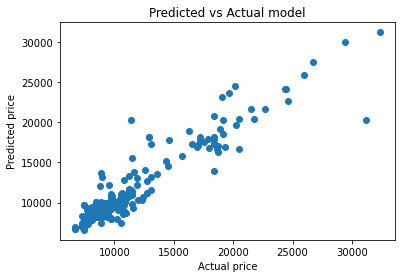

In [62]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual model')

In [64]:
import pickle
import joblib

joblib.dump(xgb,'Flight-price.pkl')

['Flight-price.pkl']